# An Investigative Study of Swarm Intelligence Optimization for Microarray Data Gene Selection

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from FS.woa import jfs   # change this to switch algorithm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from skrebate import ReliefF
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from datetime import datetime as dt
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

Now we import our dataset i.e, ionosphere

In [3]:
Df = pd.read_csv('Datasets/Ovarian_cancer.csv')

In [4]:
Df.head()

,MZ-7.86E-05,MZ2.18E-07,MZ9.60E-05,MZ0.000366014,MZ0.000810195,MZ0.001428564,MZ0.002221123,MZ0.003187869,MZ0.004328805,MZ0.005643929,...,MZ19974.404,MZ19977.042,MZ19979.68,MZ19982.319,MZ19984.957,MZ19987.596,MZ19990.235,MZ19992.874,MZ19995.513,Class
0,0.494626,0.263735,0.321841,0.220934,0.297622,0.316458,0.154763,0.223685,0.304346,0.241757,...,0.483622,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,0.449296,Normal
1,0.258063,0.406593,0.321841,0.069771,0.333335,0.354432,0.321431,0.144740,0.260869,0.142853,...,0.631765,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,0.619718,Normal
2,0.537636,0.032966,0.321841,0.209307,0.404762,0.113927,0.369049,0.223685,0.536231,0.131865,...,0.038462,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,0.035918,Normal
3,0.000000,0.395605,0.310347,0.197673,0.404762,0.455701,0.416666,0.210527,0.420292,0.274723,...,0.497864,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,0.486621,Normal
4,0.526884,0.395605,0.367817,0.383719,0.488099,0.392405,0.238094,0.500000,0.362316,0.274723,...,0.267096,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,0.251408,Normal


In [7]:
sample = list(Df.iloc[:,:-1])
sample

['MZ-7.86E-05',
 'MZ2.18E-07',
 'MZ9.60E-05',
 'MZ0.000366014',
 'MZ0.000810195',
 'MZ0.001428564',
 'MZ0.002221123',
 'MZ0.003187869',
 'MZ0.004328805',
 'MZ0.005643929',
 'MZ0.007133241',
 'MZ0.008796743',
 'MZ0.010634432',
 'MZ0.012646311',
 'MZ0.014832378',
 'MZ0.017192634',
 'MZ0.019727078',
 'MZ0.022435711',
 'MZ0.025318532',
 'MZ0.028375542',
 'MZ0.031606741',
 'MZ0.035012128',
 'MZ0.038591704',
 'MZ0.042345469',
 'MZ0.046273422',
 'MZ0.050375564',
 'MZ0.054651894',
 'MZ0.059102413',
 'MZ0.063727121',
 'MZ0.068526017',
 'MZ0.073499102',
 'MZ0.078646375',
 'MZ0.083967837',
 'MZ0.089463488',
 'MZ0.095133327',
 'MZ0.10097736',
 'MZ0.10699557',
 'MZ0.11318798',
 'MZ0.11955457',
 'MZ0.12609535',
 'MZ0.13281032',
 'MZ0.13969948',
 'MZ0.14676283',
 'MZ0.15400037',
 'MZ0.16141209',
 'MZ0.16899801',
 'MZ0.17675811',
 'MZ0.1846924',
 'MZ0.19280088',
 'MZ0.20108355',
 'MZ0.20954041',
 'MZ0.21817145',
 'MZ0.22697669',
 'MZ0.23595611',
 'MZ0.24510972',
 'MZ0.25443752',
 'MZ0.26393951',
 'MZ0

In [4]:
Df.isnull().sum()
#Df.dtypes

MZ-7.86E-05      0
MZ2.18E-07       0
MZ9.60E-05       0
MZ0.000366014    0
MZ0.000810195    0
                ..
MZ19987.596      0
MZ19990.235      0
MZ19992.874      0
MZ19995.513      0
Class            0
Length: 15155, dtype: int64

In [5]:
Df.shape

(253, 15155)

In [6]:
#Df.isna().sum()
#Df.isna()

In [7]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Columns: 15155 entries, MZ-7.86E-05 to Class
dtypes: float64(15151), int64(3), object(1)
memory usage: 29.3+ MB


In [8]:
#Df = Df.drop(['samples'],axis = 1)

In [9]:
#Df.head()

In [10]:
Df = Df.fillna(Df.mean())

C:\Users\ISUWA JEREMIAH\AppData\Local\Temp\ipykernel_14620\83483696.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Df = Df.fillna(Df.mean())


In [11]:
Df.shape

(253, 15155)

In [12]:
Df.value_counts('Class')

Class
Cancer    162
Normal     91
dtype: int64

In [13]:
#Df.value_counts('response').plot(kind = 'bar')

In [14]:
Df['Class'] = LabelEncoder().fit_transform(Df['Class'])
#Df

We then perform numerous data cleaning operations on the data.

In [15]:
#Df["Class"]

WE need to do some data preprocessing

In [16]:
Df = Df.apply(pd.to_numeric)

In [17]:
Df1 = Df.copy()

In [18]:
#First we need to make sure the class is numeric and there are no negative values

In [19]:
#Now we separate the data into train and test sets
#x = Df1.iloc[:,0:33]
#x = np.asarray(Df[:, 0:-1])
x = Df1.drop(['Class'], axis = 1)

In [20]:
#x.shape

In [21]:
y = Df.loc[:,['Class']]
#y = np.asarray(Df[:, -1])

In [22]:
#display(y)

In [23]:
'''
We need to scale the data to help improve performance.
Normalize the  data (center around 0 and scale to remove the variance
'''

scaler = StandardScaler()
xs = scaler.fit_transform(x)
xs = np.abs(xs)

#y = np.ravel(y) #Hide when using chi2, ANOVA

In [24]:
#Now we apply our feature selection i.e., Relief F, and KNN classifier
#We will want to use pipelining
start = dt.now() #representing the starting time of a task/process
fitt = SelectKBest(score_func = f_classif, k = 100)
#fitt = SelectKBest(score_func = chi2, k = 100)
#fitt = SelectKBest(score_func = mutual_info_classif, k = 100)
fitt.fit(xs,y)

#Clf = make_pipeline(ReliefF(n_features_to_select=15), KNeighborsClassifier())
#Clf = make_pipeline(SelectKBest(score_func = ReliefF, k = 10), KNeighborsClassifier())

C:\Users\ISUWA JEREMIAH\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=100)

In [25]:
xs = fitt.transform(xs)

In [26]:
#Normalization to convert to same form
#scaler = StandardScaler()
#xss = scaler.fit_transform(xs)

In [27]:
y = y.values #Activate when using chi2, ANOVA

In [28]:
xs.shape

(253, 100)

In [29]:
#We now split our data into traning and testing sets (70:30)
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3 , stratify = y)
fold = {'xt': x_train, 'yt': y_train, 'xv': x_test, 'yv': y_test}

In [30]:
#Now we set our parameters
K = 5 #K value in KNN
N = 20 #Population size
T = 50 #Max iter
#options = {'k': K, 'fold': fold, 'N': N, 'T': T}


## Firefly Algorithm (FA)
#FA contains 4 extra parameters
'''
alpha  = 1       # constant
beta0  = 1       # light amplitude
gamma  = 1       # absorbtion coefficient
theta  = 0.97    # control alpha
options = {'k':K, 'fold':fold, 'N':N, 'T':T, 'alpha':alpha, 'beta0':beta0, 'gamma':gamma, 'theta':theta}
'''
    

'''c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
options = {'k': K, 'fold': fold, 'N': N, 'T': T, 'w':w, 'c1':c1, 'c2':c2}'''

## Cuckoo Search (CS)
#CS contains 1 extra parameter

'''Pa  = 0.25   # discovery rate
options = {'k':K, 'fold':fold, 'N':N, 'T':T, 'Pa':Pa}'''


## Whale Optimization Algorithm (WOA)
#WOA contains 1 extra parameter

b  = 1    # constant
options = {'k':K, 'fold':fold, 'N':N, 'T':T, 'b':b}

In [31]:
#Now we perform our feature selection by calling the module jfs
fmdl = jfs(xs, y, options) #feature selection model
sf = fmdl['sf'] #index of selected features

Generation: 1
Best (WOA): 0.05670526315789479
Generation: 2
Best (WOA): 0.04177894736842107
Generation: 3
Best (WOA): 0.04177894736842107
Generation: 4
Best (WOA): 0.04177894736842107
Generation: 5
Best (WOA): 0.04157894736842107
Generation: 6
Best (WOA): 0.04157894736842107
Generation: 7
Best (WOA): 0.04117894736842107
Generation: 8
Best (WOA): 0.04117894736842107
Generation: 9
Best (WOA): 0.04117894736842107
Generation: 10
Best (WOA): 0.04087894736842107
Generation: 11
Best (WOA): 0.039978947368421065
Generation: 12
Best (WOA): 0.039978947368421065
Generation: 13
Best (WOA): 0.039978947368421065
Generation: 14
Best (WOA): 0.039978947368421065
Generation: 15
Best (WOA): 0.039978947368421065
Generation: 16
Best (WOA): 0.039978947368421065
Generation: 17
Best (WOA): 0.039978947368421065
Generation: 18
Best (WOA): 0.039978947368421065
Generation: 19
Best (WOA): 0.039978947368421065
Generation: 20
Best (WOA): 0.039978947368421065
Generation: 21
Best (WOA): 0.039978947368421065
Generation:

In [32]:
#print(sf)

In [33]:
#Model with selected features
num_train = np.size(x_train,0)#checks the number of samples slected in the x_train and assign to num_train
num_test = np.size(x_test, 0)#checks the number of samples slected in the x_train and assign to num_train
xtrain = x_train[:,sf]
ytrain = y_train.reshape(num_train)
xtest = x_test[:,sf]
ytest = y_test.reshape(num_test) #I suffered fixing the bug

In [34]:
#Now we build our model i.e., the classifier
model = KNeighborsClassifier(n_neighbors = 5) 
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [35]:
#Calculating for accuracy
y_pred = model.predict(xtest)
acc = accuracy_score(ytest, y_pred)*100


end = dt.now()
#print('Total duration of time is: ', str(end - start))

print('The accuracy is: ', round(acc, 2))

The accuracy is:  96.05


In [36]:
#Now we check the number of selected features
Nfea = len(sf)
print("The number of selected features is: ", str(Nfea))

The number of selected features is:  9


In [37]:
#You as well plot the confusion matrix using the (y_test, y_pred)
cm = confusion_matrix(ytest, y_pred)
#print(cm)

In [38]:
f_mea = classification_report(ytest, y_pred)
#print(f_mea)

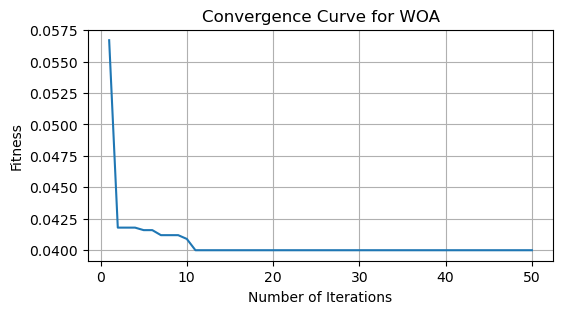

In [39]:
#Now we finally plot the conversgence curve. MY DREAM 
#Fig, ax = plt.subplots(figsize = (6,4))
#plt.title('Convergence curve', fontsize = 12)
curve = fmdl['c']
curve = curve.reshape(np.size(curve, 1))
x = np.arange(0,options['T'], 1.0)+1.0

Fig, ax = plt.subplots(figsize = (6,3))
#ax.plot(x, curve, 'o-')
plt.plot(x, curve)
plt.xlabel('Number of Iterations', fontsize = 10)
plt.ylabel('Fitness', fontsize = 10)
plt.title('Convergence Curve for WOA', fontsize = 12)
plt.grid()
plt.show()